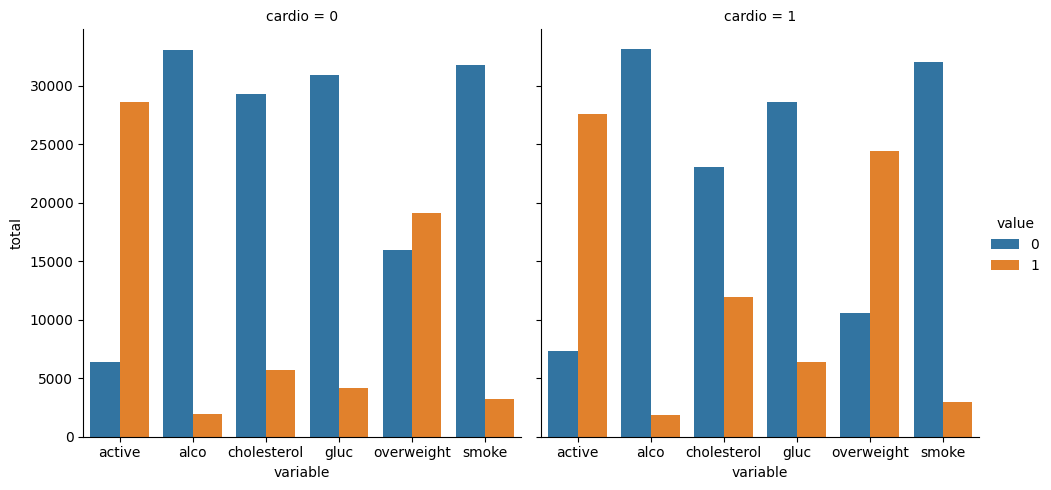

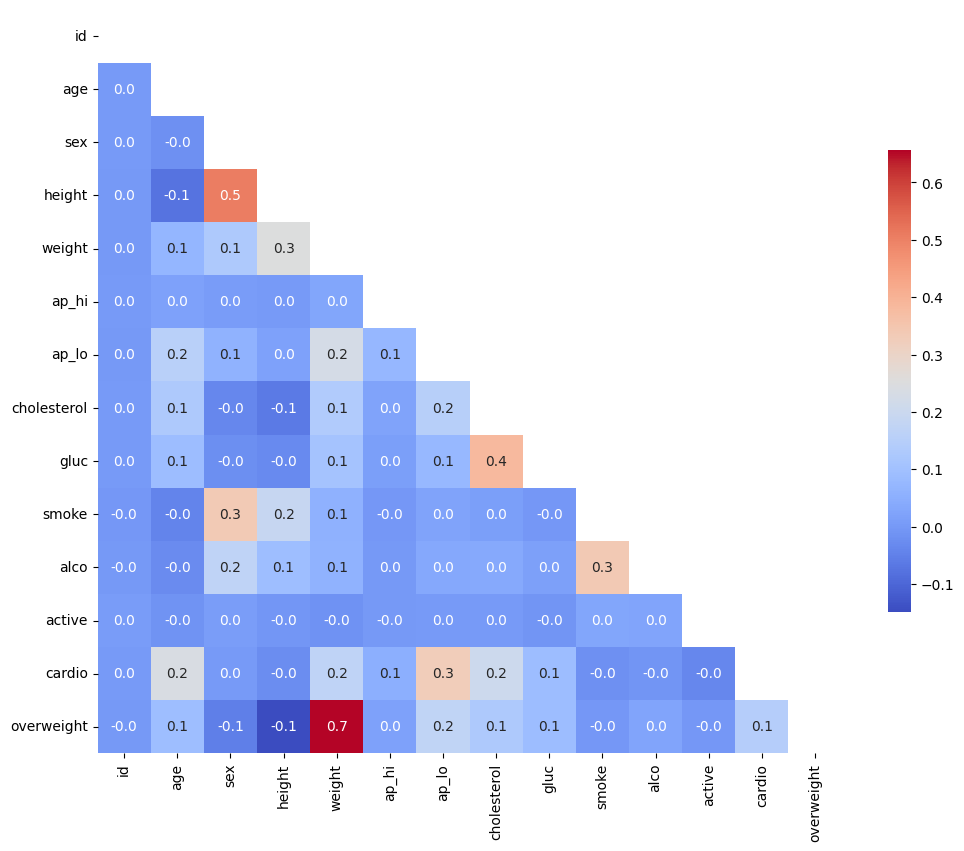

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# 1
df = pd.read_csv('medical_examination.csv')

# 2
df['overweight'] = (df['weight'] / ((df['height'] / 100) ** 2)).apply(lambda x: 1 if x > 25 else 0)

# 3
df['cholesterol'] = df['cholesterol'].apply(lambda x: 0 if x == 1 else 1)
df['gluc'] = df['gluc'].apply(lambda x: 0 if x == 1 else 1)

# 4
def draw_cat_plot():
    # 5/6
    df_cat = pd.melt(df, id_vars=['cardio'], value_vars=['cholesterol', 'gluc', 'smoke', 'alco', 'active', 'overweight'])
    
    # 7
    df_cat = df_cat.groupby(['cardio', 'variable', 'value']).size().reset_index(name='total')

    # 8
    fig = sns.catplot(x='variable', y='total', hue='value', col='cardio', data=df_cat, kind='bar').fig

    # 9
    fig.savefig('catplot.png')
    return fig


# 10
def draw_heat_map():
    # 11
    df_heat = df[
        (df['ap_lo'] <= df['ap_hi']) &
        (df['height'] >= df['height'].quantile(0.025)) &
        (df['height'] <= df['height'].quantile(0.975)) &
        (df['weight'] >= df['weight'].quantile(0.025)) &
        (df['weight'] <= df['weight'].quantile(0.975))
    ]

    # 12
    corr = df_heat.corr()

    # 13
    mask = np.triu(np.ones_like(corr, dtype=bool))

    # 14
    fig, ax = plt.subplots(figsize=(12, 12))

    # 15
    sns.heatmap(corr, mask=mask, annot=True, fmt='.1f', ax=ax, cmap='coolwarm', square=True, cbar_kws={"shrink": .5})

    # 16
    fig.savefig('heatmap.png')
    return fig


if __name__ == "__main__":
    # Gerar o gráfico categórico e salvar
    draw_cat_plot()

    # Gerar o heatmap e salvar
    draw_heat_map()

..
----------------------------------------------------------------------
Ran 2 tests in 1.597s

OK
..
----------------------------------------------------------------------
Ran 2 tests in 0.974s

OK


<unittest.runner.TextTestResult run=2 errors=0 failures=0>

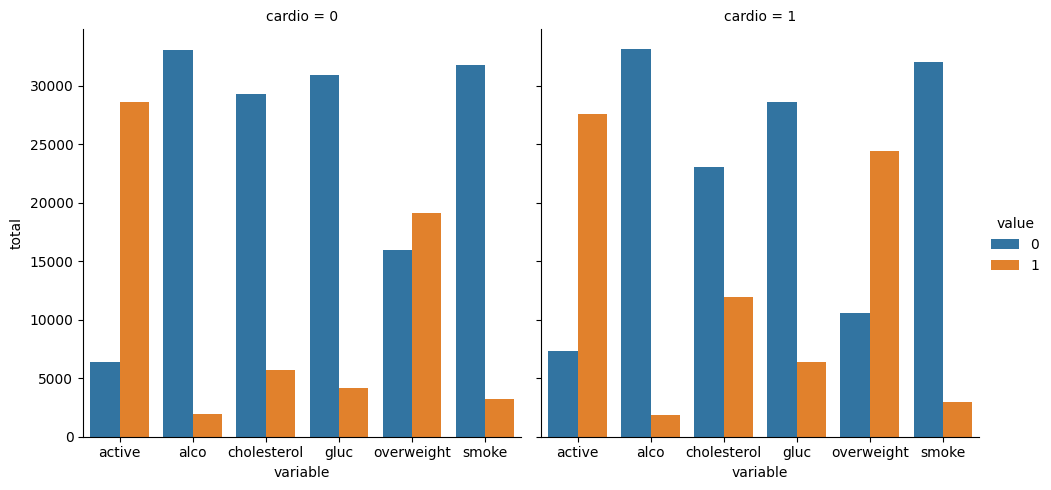

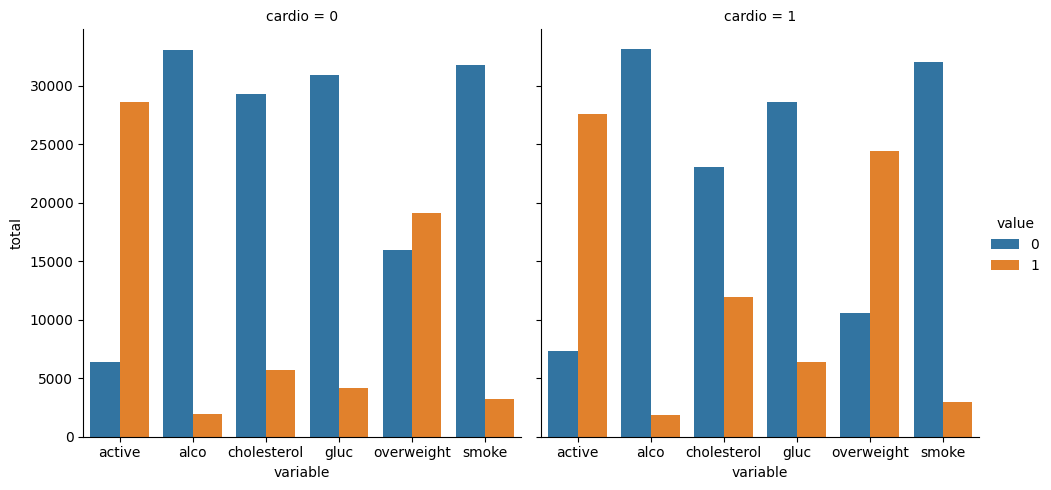

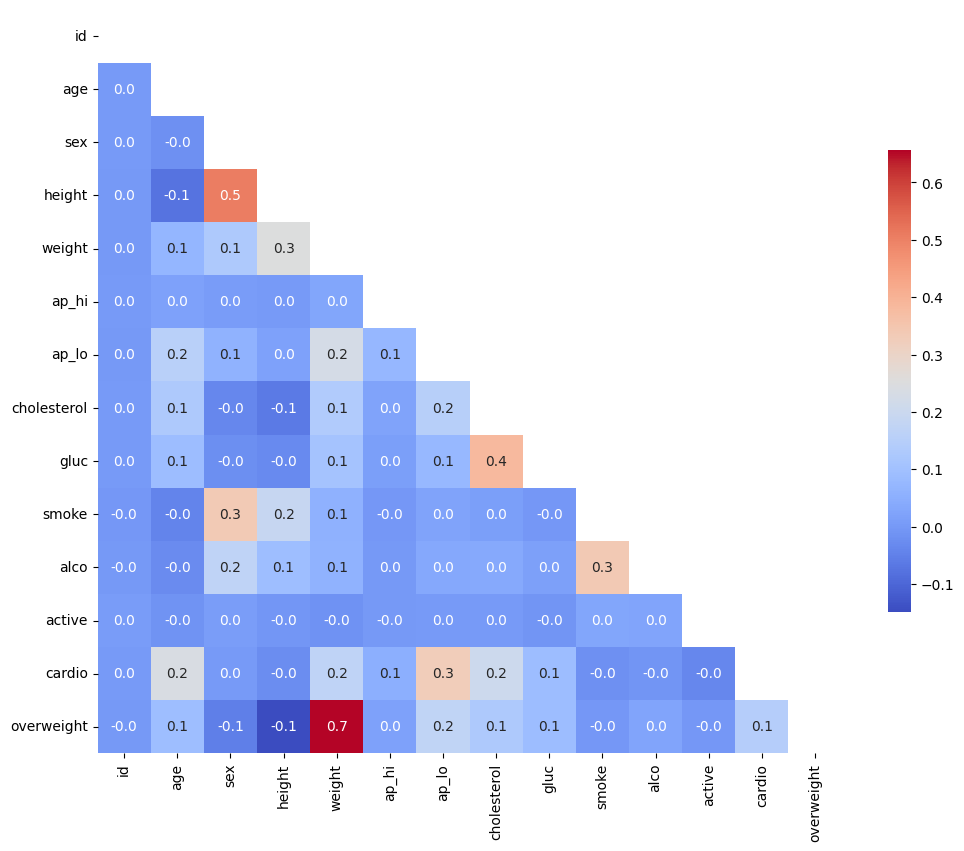

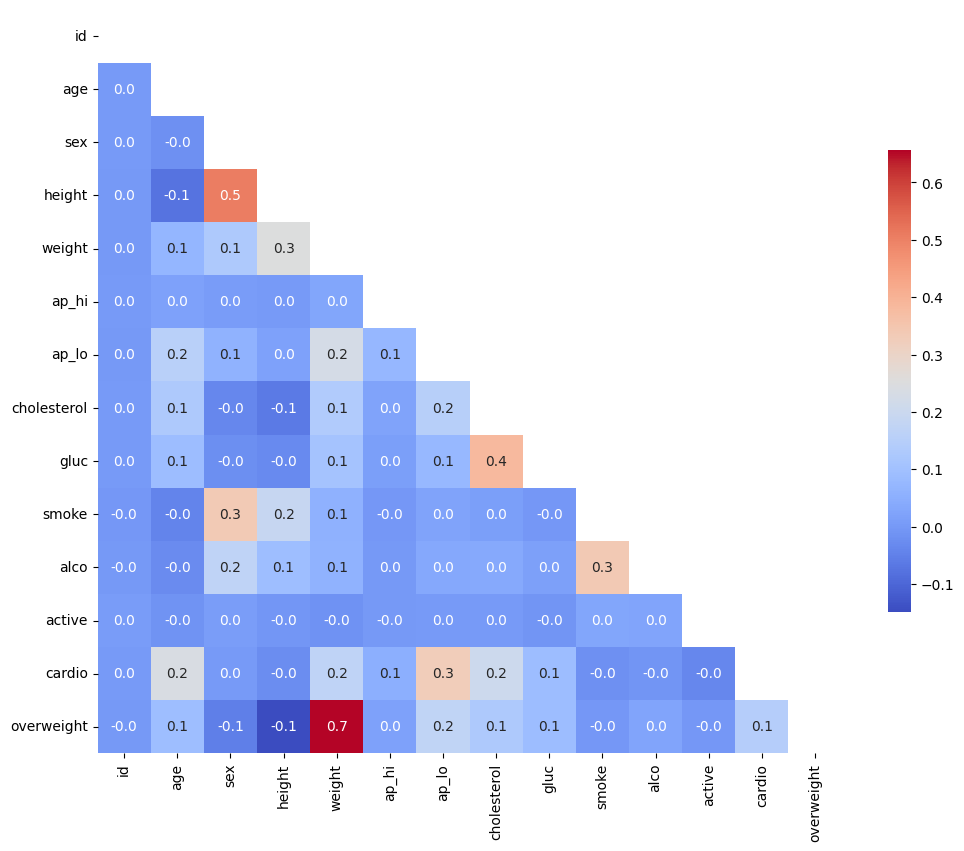

In [2]:
import unittest
import matplotlib as mpl

# Incluindo as funções draw_cat_plot e draw_heat_map que já estão no notebook

# Testes para o gráfico categórico
class CatPlotTestCase(unittest.TestCase):
    def setUp(self):
        # Agora vamos chamar a função diretamente do notebook
        self.fig = draw_cat_plot()
        self.ax = self.fig.axes[0]
    
    def test_line_plot_labels(self):
        actual = self.ax.get_xlabel()
        expected = "variable"
        self.assertEqual(actual, expected, "Expected line plot xlabel to be 'variable'")
        actual = self.ax.get_ylabel()
        expected = "total"
        self.assertEqual(actual, expected, "Expected line plot ylabel to be 'total'")
        actual = []
        for label in self.ax.get_xaxis().get_majorticklabels():
            actual.append(label.get_text())
        expected = ['active', 'alco', 'cholesterol', 'gluc', 'overweight', 'smoke']
        self.assertEqual(actual, expected, "Expected bar plot secondary x labels to be 'active', 'alco', 'cholesterol', 'gluc', 'overweight', 'smoke'")

    def test_bar_plot_number_of_bars(self):
        actual = len([rect for rect in self.ax.get_children() if isinstance(rect, mpl.patches.Rectangle)])
        expected = 13
        self.assertEqual(actual, expected, "Expected a different number of bars chart.")


# Testes para o heatmap
class HeatMapTestCase(unittest.TestCase):
    def setUp(self):
        # Chamando a função diretamente do notebook
        self.fig = draw_heat_map()
        self.ax = self.fig.axes[0]

    def test_heat_map_labels(self):
        actual = []
        for label in self.ax.get_xticklabels():
            actual.append(label.get_text())
        expected = ['id', 'age', 'sex', 'height', 'weight', 'ap_hi', 'ap_lo', 'cholesterol', 'gluc', 'smoke', 'alco', 'active', 'cardio', 'overweight']
        self.assertEqual(actual, expected, "Expected heat map labels to be 'id', 'age', 'sex', 'height', 'weight', 'ap_hi', 'ap_lo', 'cholesterol', 'gluc', 'smoke', 'alco', 'active', 'cardio', 'overweight'.")
    
    def test_heat_map_values(self):
        actual = [text.get_text() for text in self.ax.get_default_bbox_extra_artists() if isinstance(text, mpl.text.Text)]
        expected = ['0.0', '0.0', '-0.0', '0.0', '-0.1', '0.5', '0.0', '0.1', '0.1', '0.3', '0.0', '0.0', '0.0', '0.0', '0.0', '0.0', '0.2', '0.1', '0.0', '0.2', '0.1', '0.0', '0.1', '-0.0', '-0.1', '0.1', '0.0', '0.2', '0.0', '0.1', '-0.0', '-0.0', '0.1', '0.0', '0.1', '0.4', '-0.0', '-0.0', '0.3', '0.2', '0.1', '-0.0', '0.0', '0.0', '-0.0', '-0.0', '-0.0', '0.2', '0.1', '0.1', '0.0', '0.0', '0.0', '0.0', '0.3', '0.0', '-0.0', '0.0', '-0.0', '-0.0', '-0.0', '0.0', '0.0', '-0.0', '0.0', '0.0', '0.0', '0.2', '0.0', '-0.0', '0.2', '0.1', '0.3', '0.2', '0.1', '-0.0', '-0.0', '-0.0', '-0.0', '0.1', '-0.1', '-0.1', '0.7', '0.0', '0.2', '0.1', '0.1', '-0.0', '0.0', '-0.0', '0.1']
        self.assertEqual(actual, expected, "Expected different values in heat map.")

# Executando os testes no notebook
unittest.TextTestRunner().run(unittest.TestLoader().loadTestsFromTestCase(CatPlotTestCase))
unittest.TextTestRunner().run(unittest.TestLoader().loadTestsFromTestCase(HeatMapTestCase))
